<a href="https://colab.research.google.com/github/hernandezhdd/TrabajosMachineLearning/blob/master/TP3/ML_TP3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Esto lo saquéé de internet es para graficar las distribuciones.

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
import pandas as pd
import numpy as np

N = 100 #cantidad de datos

valores_a = np.random.normal((1,3), (1.5,0.75), (N,2)) #Vector de datos random-normales
valores_b = np.random.normal((-1,-2), (1,5), (N,2))

df1 = pd.DataFrame(valores_a, columns=['y','x']) #Hago dos columnas con datos
# df1['etiqueta'] = 'a' #Una columna con etiquetas
df1['etiqueta'] = 0 #Una columna con etiquetas
df2 = pd.DataFrame(valores_b, columns=['y','x'])
# df2['etiqueta'] = 'b'
df2['etiqueta'] = 1
df = pd.concat([df1,df2], ignore_index=True) #Concateno los dos df
df[95:105]

,y,x,etiqueta
95,-0.446110,4.060118,0
96,-0.460475,4.031217,0
97,0.301318,2.683167,0
98,-0.129829,3.679153,0
99,-1.774533,3.097908,0
100,-2.877218,4.641315,1
101,-0.811958,4.991241,1
102,-1.215605,0.370393,1
103,-0.713684,-5.360460,1
104,-1.745308,-7.726359,1


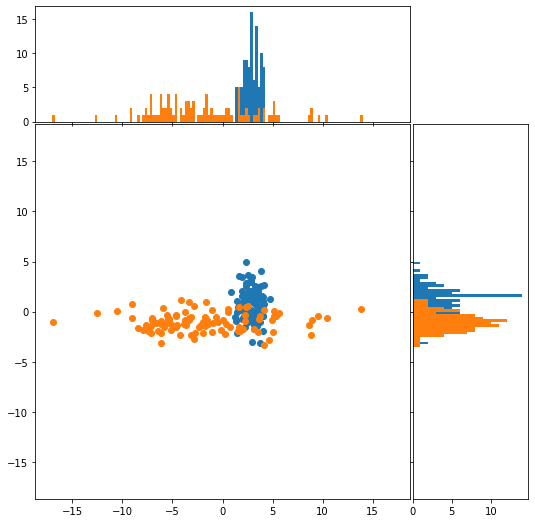

In [ ]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(df1.x, df1.y, ax, ax_histx, ax_histy)
scatter_hist(df2.x, df2.y, ax, ax_histx, ax_histy)

plt.show()

Se puede ver que desde las dos direcciones las distribuciones tienen forma de gaussianas.

In [ ]:
train_test_split?

In [ ]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

k_n = np.floor(np.sqrt(N)).astype('int') #cantidad de vecinos, 

# ¿esta raiz es de la cantidad de datos totales?
# ¿O de la cantidad de datos en el dataset de entrenamiento?

#RTA: Era del de entrenamiento, osea que lo anterior está mal

data_train_sobre_total = 0.5

k_n = np.floor( np.sqrt(2*N * data_train_sobre_total) ).astype('int') #cantidad de vecinos, 

X, y = df[['x','y']].to_numpy(), df.etiqueta.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total, random_state=10)

knn = neighbors.KNeighborsClassifier(n_neighbors = k_n)
knn.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

In [ ]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

k_n2 = 1 

data_train_sobre_total2 = 0.5

X2, y2 = df[['x','y']].to_numpy(), df.etiqueta.to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = data_train_sobre_total2, random_state=10)

knn2 = neighbors.KNeighborsClassifier(n_neighbors = k_n2)
knn2.fit(X2_train, y2_train)

x_min2, x_max2 = X2[:, 0].min() - .1, X2[:, 0].max() + .1
y_min2, y_max2 = X2[:, 1].min() - .1, X2[:, 1].max() + .1
xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 100),
                        np.linspace(y_min2, y_max2, 100))
Z2 = knn2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z2 = Z2.reshape(xx2.shape)

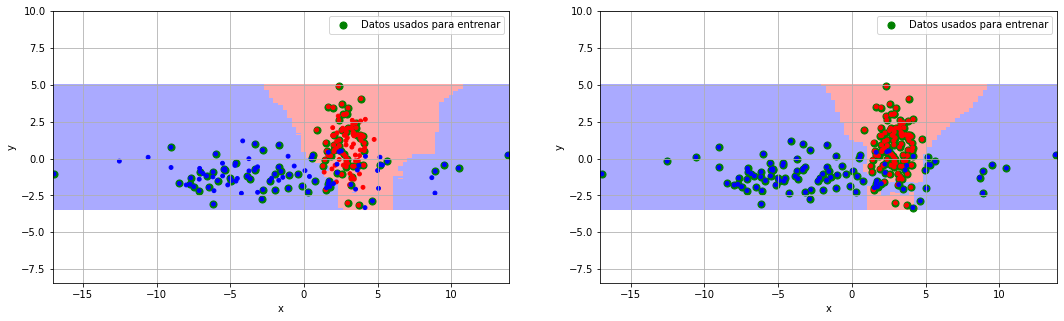

In [ ]:
# Create color maps for 3-class classification problem, as with iris

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.subplots(1,2, figsize=(18,5), sharex=True, sharey=True)
plt.subplot(121)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points

plt.scatter(X_train[:, 0], X_train[:, 1], s=50, c='g', label='Datos usados para entrenar')
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap=cmap_bold)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')

plt.grid()
plt.legend()
plt.subplot(122)

plt.pcolormesh(xx2, yy2, Z2, cmap=cmap_light)

# Plot also the training points

plt.scatter(X2[:, 0], X2[:, 1], s=50, c='g', label='Datos usados para entrenar')
plt.scatter(X2[:, 0], X2[:, 1], s=15, c=y2, cmap=cmap_bold)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')

plt.grid()
plt.legend()
plt.show()

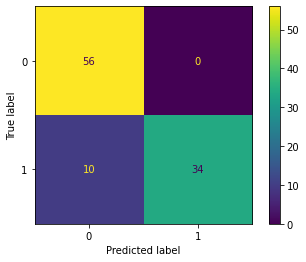

In [ ]:
from sklearn import metrics
matriz_conf_1 = metrics.plot_confusion_matrix(knn, X_test, y_test)

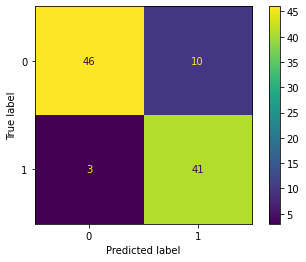

In [ ]:
matriz_conf_2 = metrics.plot_confusion_matrix(knn2, X2_test, y2_test)

In [ ]:
y_prediccion = knn.predict(X_test)

print(metrics.classification_report(y_test, y_prediccion))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        56
           1       1.00      0.77      0.87        44

    accuracy                           0.90       100
   macro avg       0.92      0.89      0.89       100
weighted avg       0.92      0.90      0.90       100



In [ ]:
y2_prediccion = knn2.predict(X2_test)

print(metrics.classification_report(y2_test, y2_prediccion))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        56
           1       0.80      0.93      0.86        44

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



Esta parte es un robo del siguiente kaggle:

https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies

data_train_sobre_total = 0.5

neighbors = np.arange(1, np.floor( np.sqrt(2*N * data_train_sobre_total) + 5 ).astype('int') )
 #Calculo para diferente cantidad de vecinos, desde 1 hasta sqrt(datos_train)+4

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

X, y = df[['x','y']].to_numpy(), df.etiqueta.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= data_train_sobre_total)#, random_state=10)

for i,k in enumerate(neighbors):
    #Hace un loop para encontrar el valor optimo de cantidad de vecinos.
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

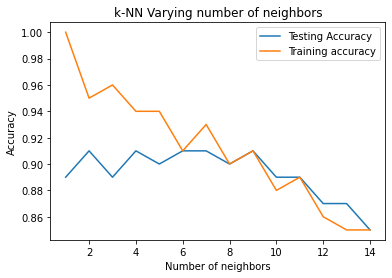

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Este metodo no me sirve para elegir. Las diferencias que hay entre 1 vecino y 14 vecinos en la linea celeste son solo ruido. Probando con diferentes splits del mismo dataset a curva siempre tiene tendencias distintas, pero la variacion siempre es menos de 5%.

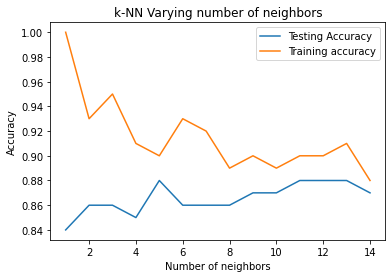

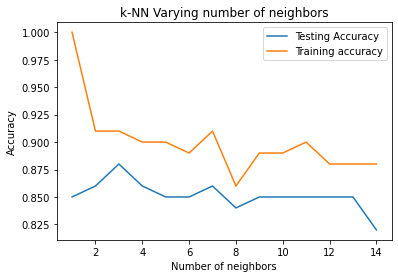

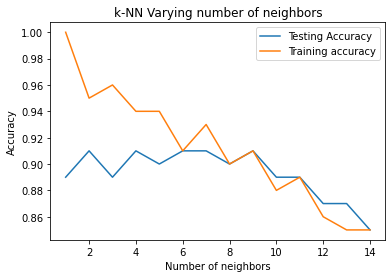

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
#Va a ver cual es el mejor nro de vecinos.
# Para eso hace un dicc.
param_grid = {'n_neighbors':np.arange(1,np.floor( np.sqrt(2*N * data_train_sobre_total) + 3 ).astype('int'))}

In [ ]:
GridSearchCV?

In [ ]:
knn = KNeighborsClassifier()
#Aparentemente acá le dice a GridSearch que haga knn, con los valores del dicc
#param_grid, y ¿cv=5? Cantidad de particiones.
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#Ahora se fija cual fue la mejor accuracy
print('best acc',knn_cv.best_score_)
#y ahora con cuantos vecinos se dio
knn_cv.best_params_

best acc 0.9


{'n_neighbors': 7}

No me convence nada, ni se fija si hay una diferencia real entre 7 o cualquier otro nro de vecinos.

In [ ]:
knn_cv?

In [ ]:
resultados = pd.DataFrame(knn_cv.cv_results_)
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001008,0.000186,0.003702,0.000725,1,{'n_neighbors': 1},0.950,0.925,0.8,0.850,0.850,0.875,0.054772,8
1,0.000498,0.000035,0.001950,0.000062,2,{'n_neighbors': 2},0.975,0.950,0.8,0.825,0.825,0.875,0.072457,8


(0.0, 0.07970257210404191)

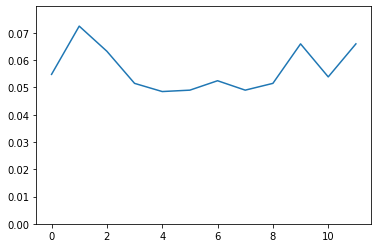

In [ ]:
plt.plot(resultados.std_test_score)
plt.ylim((0,1.1*resultados.std_test_score.max()))

(0.0, 0.9900000000000001)

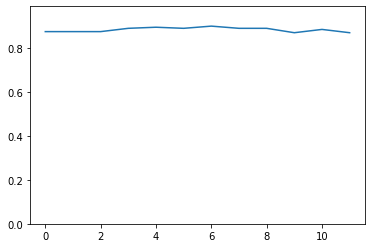

In [ ]:
plt.plot(resultados.mean_test_score)
plt.ylim((0,1.1*resultados.mean_test_score.max()))
# plt.ylim((0.8, 1))

Conclusion: "Son lo mismo." Del Caño (2015)

(0.6, 1.1)

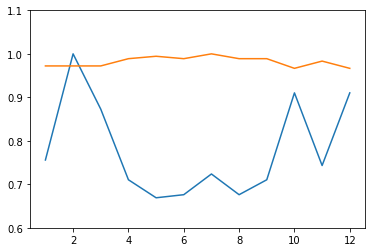

In [ ]:
# A ver en porcentajes:
plt.plot(resultados.param_n_neighbors, resultados.std_test_score/resultados.std_test_score.max())
plt.plot(resultados.param_n_neighbors, resultados.mean_test_score/resultados.mean_test_score.max())
plt.ylim((0.6,1.1))

Elegiría 4 o 5, por la baja en std

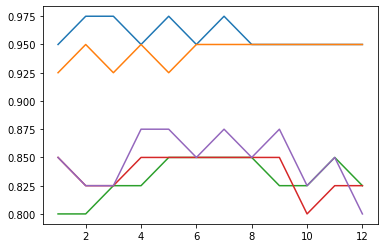

In [ ]:
plt.figure()
plt.plot(resultados.param_n_neighbors,resultados[['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']])
plt.show()

Que raro da eso, no puede estar bien. Por otro lado, practicamente ninguna curva tiene una tendencia real con respecto al nro. de vecinos.